In [14]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


8


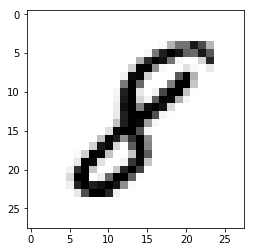

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [18]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [19]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.2066 - acc: 0.9378
Epoch 2/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0829 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.0584 - acc: 0.9816
Epoch 4/10
60000/60000 [==============================] - 26s 429us/step - loss: 0.0440 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.0357 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0285 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 28s 472us/step - loss: 0.0258 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.0218 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.0194 - acc: 0.9935
Epoch 10/10
60000/60000 [==============================] - 31s 516us/step - loss: 

In [20]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 163us/step


[0.06561256809790139, 0.9845]

In [21]:
image_index = 0
category_name = ['ZERO','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE']

Category: FIVE Label: FIVE


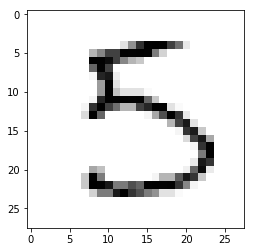

In [37]:
image_index += 1
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Category: {0} Label: {1}'.format(category_name[pred.argmax()],category_name[y_test[image_index]]))

In [23]:
from IPython.display import display, Markdown
def print_color(str):
    return_str = ''
    cursor = 0
    search = True
    html_start = '<span style="color: '
    html_end = '">'
    html_close = '</span>'
    while cursor < len(str):
        tag_open = str.find('{',cursor)
        if tag_open >= 0:
            return_str += str[cursor:tag_open]
            tag_close = str.find('}',tag_open)
            if tag_close >= 0:
                if tag_close - tag_open == 1:
                    return_str += html_close
                else:
                    tag = str[tag_open+1:tag_close]
                    if tag == 'red':
                        return_str += html_start+'red'+html_end
                cursor = tag_close + 1
            else:
                return_str += str[tag_open:]
                cursor = len(str)
        else:
            return_str += str[cursor:]
            cursor = len(str)
    display(Markdown(return_str))

print_color('abcd{red}def{}ghi')

abcd<span style="color: red">def</span>ghi